In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from collections import Counter
import numpy as np
import stanza
import nltk
from nltk.corpus import stopwords

In [44]:
import json
file = open('heavenli.json', 'r')
# file = open('xnli.json', 'r')
data = [json.loads(line.strip()) for line in file]
file.close()

In [4]:
#average sentence length
en_length = [e['en_sentence']['text'].count(' ') + 1 for e in data]
entail_length = [e['vi_sentence']['text'].count(' ') + 1 for e in data if e['label']=='Entailment']
contra_length = [e['vi_sentence']['text'].count(' ') + 1 for e in data if e['label']=='Contradiction']
neutral_length = [e['vi_sentence']['text'].count(' ') + 1 for e in data if e['label']=='Neutral']
np.mean(en_length), np.mean(entail_length), np.mean(contra_length), np.mean(neutral_length) 

(26.372713791398912, 32.75135936727632, 28.027352117317516, 26.457900807381776)

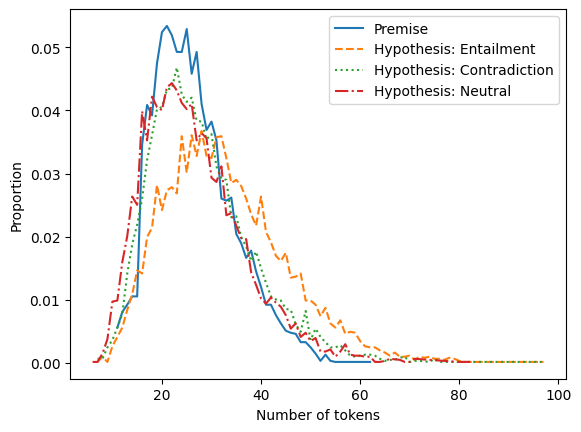

In [26]:
#sentence length distribution
en_length = dict(Counter([e['en_sentence']['text'].count(' ') + 1 for e in data]))
vi_length = dict(Counter([e['vi_sentence']['text'].count(' ') + 1 for e in data]))
entail_length = dict(Counter([e['vi_sentence']['text'].count(' ') + 1 for e in data if e['label']=='Entailment']))
contra_length = dict(Counter([e['vi_sentence']['text'].count(' ') + 1 for e in data if e['label']=='Contradiction']))
neutral_length = dict(Counter([e['vi_sentence']['text'].count(' ') + 1 for e in data if e['label']=='Neutral']))


en_length = [(l,f) for l, f in en_length.items()]
vi_length = [(l,f) for l, f in vi_length.items()]
entail_length = [(l,f) for l, f in entail_length.items()]
contra_length = [(l,f) for l, f in contra_length.items()]
neutral_length = [(l,f) for l, f in neutral_length.items()]


en_length.sort()
vi_length.sort()
entail_length.sort()
contra_length.sort()
neutral_length.sort()


s = np.sum([e[1] for e in en_length])
en_length = [(e[0],e[1]/s) for e in en_length]

s = np.sum([e[1] for e in entail_length])
entail_length = [(e[0],e[1]/s) for e in entail_length]

s = np.sum([e[1] for e in contra_length])
contra_length = [(e[0],e[1]/s) for e in contra_length]

s = np.sum([e[1] for e in neutral_length])
neutral_length = [(e[0],e[1]/s) for e in neutral_length]


plt.plot([e[0] for e in en_length], [e[1] for e in en_length], label = 'Premise')
# plt.plot([e[0] for e in vi_length], [e[1] for e in vi_length], label = 'Hypothesis')
plt.plot([e[0] for e in entail_length], [e[1] for e in entail_length], 
         label = 'Hypothesis: Entailment', linestyle="--")
plt.plot([e[0] for e in contra_length], [e[1] for e in contra_length], 
         label = 'Hypothesis: Contradiction', linestyle=':')
plt.plot([e[0] for e in neutral_length], [e[1] for e in neutral_length], 
         label = 'Hypothesis: Neutral', linestyle="-.")
plt.legend()
plt.xlabel('Number of tokens')
plt.ylabel('Proportion')
plt.savefig('ntokens_distribution.eps')
plt.show()



In [29]:
(sum([e[1] for e in en_length if 15 <= e[0] <= 35]),
sum([e[1] for e in entail_length if 15 <= e[0] <= 35]), 
sum([e[1] for e in contra_length if 15 <= e[0] <= 35]), 
sum([e[1] for e in neutral_length if 15 <= e[0] <= 35]) )

(0.8266600757950239,
 0.6032295271049597,
 0.7403196572746746,
 0.7418026033942989)

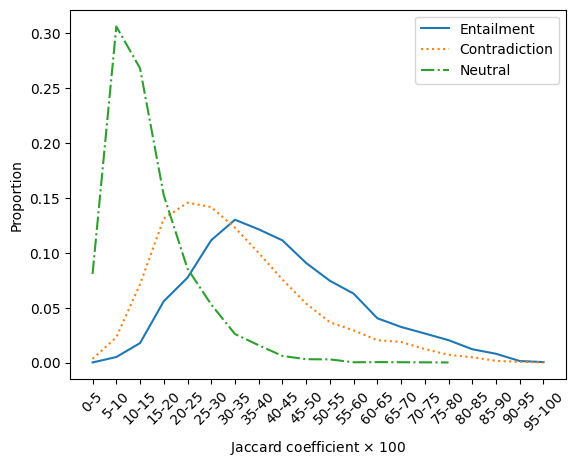

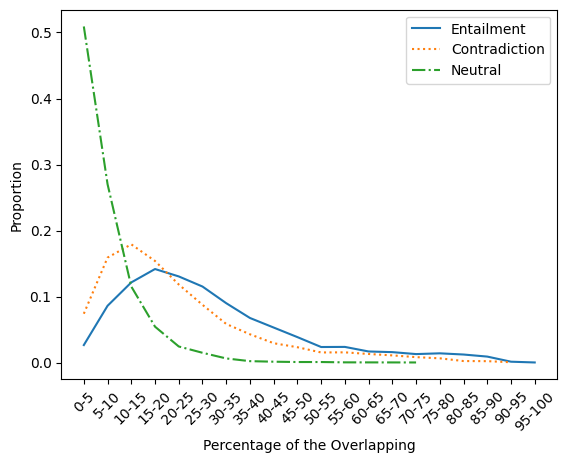

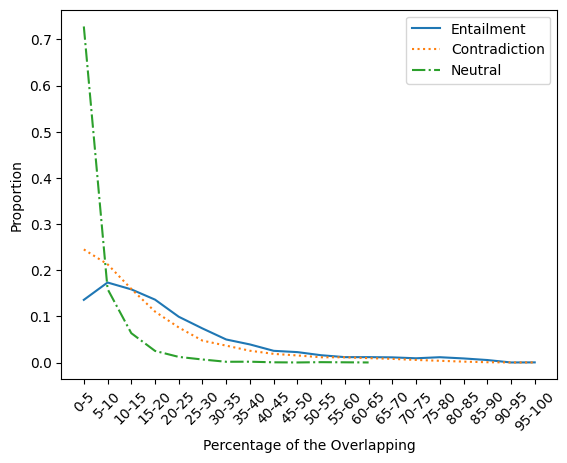

In [28]:
# overlapping
from nltk import ngrams
def get_ngrams(text,n):
    grams = ngrams(text.split(), n)
    grams = [e for e in grams]
    grams = [' '.join(e) for e in grams]
    return grams
def compute_overlapping(text1,text2,ngram):
    grams1 = get_ngrams(text1,ngram)
    grams2 = get_ngrams(text2,ngram)
    
#     grams1 = set(grams1)
#     grams2 = set(grams2)
    
    intersection = len(list(set(grams1).intersection(grams2)))
    union = (len(grams1) + len(grams2)) - intersection
    return float(intersection) / union
entail_unigram_overlapping = [
   compute_overlapping(e['en_sentence']['vi_translation'].lower(), 
                    e['vi_sentence']['text'].lower(),1) for e in data if e['label']=='Entailment' 
]

entail_bigram_overlapping = [
   compute_overlapping(e['en_sentence']['vi_translation'].lower(), 
                    e['vi_sentence']['text'].lower(),2) for e in data if e['label']=='Entailment' 
]

entail_trigram_overlapping = [
   compute_overlapping(e['en_sentence']['vi_translation'].lower(), 
                    e['vi_sentence']['text'].lower(),3) for e in data if e['label']=='Entailment' 
]


contra_unigram_overlapping = [
   compute_overlapping(e['en_sentence']['vi_translation'].lower(), 
                    e['vi_sentence']['text'].lower(),1) for e in data if e['label']=='Contradiction' 
]

contra_bigram_overlapping = [
   compute_overlapping(e['en_sentence']['vi_translation'].lower(), 
                    e['vi_sentence']['text'].lower(),2) for e in data if e['label']=='Contradiction' 
]

contra_trigram_overlapping = [
   compute_overlapping(e['en_sentence']['vi_translation'].lower(), 
                    e['vi_sentence']['text'].lower(),3) for e in data if e['label']=='Contradiction' 
]



neutral_unigram_overlapping = [
   compute_overlapping(e['en_sentence']['vi_translation'].lower(), 
                    e['vi_sentence']['text'].lower(),1) for e in data if e['label']=='Neutral' 
]

neutral_bigram_overlapping = [
   compute_overlapping(e['en_sentence']['vi_translation'].lower(), 
                    e['vi_sentence']['text'].lower(),2) for e in data if e['label']=='Neutral' 
]

neutral_trigram_overlapping = [
   compute_overlapping(e['en_sentence']['vi_translation'].lower(), 
                    e['vi_sentence']['text'].lower(),3) for e in data if e['label']=='Neutral' 
]


entail_overlapping = dict(Counter([min(int(min(int(e*100) + 1,100)/5 + 1),20) for e in entail_unigram_overlapping]))
contra_overlapping = dict(Counter([min(int(min(int(e*100) + 1,100)/5 + 1),20) for e in contra_unigram_overlapping]))
neutral_overlapping = dict(Counter([min(int(min(int(e*100) + 1,100)/5 +1),20) for e in neutral_unigram_overlapping]))

entail_overlapping = [(l,f) for l, f in entail_overlapping.items()]
contra_overlapping = [(l,f) for l, f in contra_overlapping.items()]
neutral_overlapping = [(l,f) for l, f in neutral_overlapping.items()]


entail_overlapping.sort()
contra_overlapping.sort()
neutral_overlapping.sort()

s = np.sum([e[1] for e in entail_overlapping])
entail_overlapping = [(e[0],e[1]/s) for e in entail_overlapping]

s = np.sum([e[1] for e in contra_overlapping])
contra_overlapping = [(e[0],e[1]/s) for e in contra_overlapping]

s = np.sum([e[1] for e in neutral_overlapping])
neutral_overlapping = [(e[0],e[1]/s) for e in neutral_overlapping]


plt.plot([e[0] for e in entail_overlapping], [e[1] for e in entail_overlapping], label = 'Entailment')

x_ticks_labels = [f"{i*5}-{(i+1)*5}" for i in range(20)]
# plt.set_xticks([i for i in range(20)])
# plt.set_xticklabels(x_ticks_labels, rotation='vertical', fontsize=18)
plt.xticks([i+1 for i in range(20)],x_ticks_labels,rotation = 45)


plt.plot([e[0] for e in contra_overlapping], [e[1] for e in contra_overlapping], 
         label = 'Contradiction', linestyle=':')
plt.plot([e[0] for e in neutral_overlapping], [e[1] for e in neutral_overlapping], 
         label = 'Neutral', linestyle="-.")
plt.legend()
# plt.xlabel('Percentage of the Overlapping')
plt.xlabel(r'Jaccard coefficient $\times$ 100')
plt.ylabel('Proportion')
plt.savefig('token_unigram_overlapping_distribution.eps',bbox_inches='tight')
plt.show()



entail_overlapping = dict(Counter([min(int(min(int(e*100) + 1,100)/5 + 1),20) for e in entail_bigram_overlapping]))
contra_overlapping = dict(Counter([min(int(min(int(e*100) + 1,100)/5 + 1),20) for e in contra_bigram_overlapping]))
neutral_overlapping = dict(Counter([min(int(min(int(e*100) + 1,100)/5 +1),20) for e in neutral_bigram_overlapping]))

entail_overlapping = [(l,f) for l, f in entail_overlapping.items()]
contra_overlapping = [(l,f) for l, f in contra_overlapping.items()]
neutral_overlapping = [(l,f) for l, f in neutral_overlapping.items()]


entail_overlapping.sort()
contra_overlapping.sort()
neutral_overlapping.sort()

s = np.sum([e[1] for e in entail_overlapping])
entail_overlapping = [(e[0],e[1]/s) for e in entail_overlapping]

s = np.sum([e[1] for e in contra_overlapping])
contra_overlapping = [(e[0],e[1]/s) for e in contra_overlapping]

s = np.sum([e[1] for e in neutral_overlapping])
neutral_overlapping = [(e[0],e[1]/s) for e in neutral_overlapping]


plt.plot([e[0] for e in entail_overlapping], [e[1] for e in entail_overlapping], label = 'Entailment')

x_ticks_labels = [f"{i*5}-{(i+1)*5}" for i in range(20)]
# plt.set_xticks([i for i in range(20)])
# plt.set_xticklabels(x_ticks_labels, rotation='vertical', fontsize=18)
plt.xticks([i+1 for i in range(20)],x_ticks_labels,rotation = 45)


plt.plot([e[0] for e in contra_overlapping], [e[1] for e in contra_overlapping], 
         label = 'Contradiction', linestyle=':')
plt.plot([e[0] for e in neutral_overlapping], [e[1] for e in neutral_overlapping], 
         label = 'Neutral', linestyle="-.")
plt.legend()
plt.xlabel('Percentage of the Overlapping')
plt.ylabel('Proportion')
plt.savefig('token_bigram_overlapping_distribution.eps',bbox_inches='tight')
plt.show()



entail_overlapping = dict(Counter([min(int(min(int(e*100) + 1,100)/5 + 1),20) for e in entail_trigram_overlapping]))
contra_overlapping = dict(Counter([min(int(min(int(e*100) + 1,100)/5 + 1),20) for e in contra_trigram_overlapping]))
neutral_overlapping = dict(Counter([min(int(min(int(e*100) + 1,100)/5 +1),20) for e in neutral_trigram_overlapping]))

entail_overlapping = [(l,f) for l, f in entail_overlapping.items()]
contra_overlapping = [(l,f) for l, f in contra_overlapping.items()]
neutral_overlapping = [(l,f) for l, f in neutral_overlapping.items()]


entail_overlapping.sort()
contra_overlapping.sort()
neutral_overlapping.sort()

s = np.sum([e[1] for e in entail_overlapping])
entail_overlapping = [(e[0],e[1]/s) for e in entail_overlapping]

s = np.sum([e[1] for e in contra_overlapping])
contra_overlapping = [(e[0],e[1]/s) for e in contra_overlapping]

s = np.sum([e[1] for e in neutral_overlapping])
neutral_overlapping = [(e[0],e[1]/s) for e in neutral_overlapping]


plt.plot([e[0] for e in entail_overlapping], [e[1] for e in entail_overlapping], label = 'Entailment')

x_ticks_labels = [f"{i*5}-{(i+1)*5}" for i in range(20)]
# plt.set_xticks([i for i in range(20)])
# plt.set_xticklabels(x_ticks_labels, rotation='vertical', fontsize=18)
plt.xticks([i+1 for i in range(20)],x_ticks_labels,rotation = 45)


plt.plot([e[0] for e in contra_overlapping], [e[1] for e in contra_overlapping], 
         label = 'Contradiction', linestyle=':')
plt.plot([e[0] for e in neutral_overlapping], [e[1] for e in neutral_overlapping], 
         label = 'Neutral', linestyle="-.")
plt.legend()
plt.xlabel('Percentage of the Overlapping')
plt.ylabel('Proportion')
plt.savefig('token_trigram_overlapping_distribution.eps',bbox_inches='tight')
plt.show()

# Topic modeling

In [5]:
nlp = stanza.Pipeline(lang='en', processors='tokenize', tokenize_no_ssplit=True)
def get_tokens(text):
    doc = nlp(text)
    tokens = []
    for i, sentence in enumerate(doc.sentences):
        tokens.extend([token.text.lower() for token in sentence.tokens])
    return tokens
        

2024-01-05 08:51:08 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2024-01-05 08:51:08 INFO: Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |

2024-01-05 08:51:08 INFO: Using device: cuda
2024-01-05 08:51:08 INFO: Loading: tokenize
2024-01-05 08:51:12 INFO: Done loading processors!


In [6]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [7]:
docs = [get_tokens(e['en_sentence']['text']) for e in data]

In [10]:
import string
def haschar(word):
    for char in word:
        if char.isalpha():
            return True
    return False
def contain_puntuation(word):
    for e in string.punctuation:
        if e in word:
            return True
    return False
removed_words = set(stopwords.words('english'))
unique_docs = [docs[i] for i in range(0,len(docs),3)]
unique_docs = [[w for w in unique_docs[i] if (w not in removed_words) and  haschar(w) and (len(w) >= 3)] for i in range(len(unique_docs))]
unique_docs = [[w for w in doc if not contain_puntuation(w)] for doc in unique_docs]

In [11]:
unique_docs = [[(lemmatizer.lemmatize(w)) for w in d] for d in unique_docs]

In [14]:
from gensim.corpora.dictionary import Dictionary
import lda
from scipy.sparse import csr_matrix

In [15]:
vocab = {}

In [16]:
# corpus = [[dataset.vocab[w] for w in d['bow']] for d in dataset.documents]
dictionary = Dictionary(unique_docs)
corpus = [dictionary.doc2bow(text) for text in unique_docs]
rows = []
cols = []
counts = []
for d in range(len(corpus)):
    row = [d] * len(corpus[d])
    col = [e[0] for e in corpus[d]]
    count = [e[1] for e in corpus[d]]

    rows.extend(row)
    cols.extend(col)
    counts.extend(count)
corpus = csr_matrix((counts, (rows, cols)))
model = lda.LDA(n_topics=5, n_iter=1000)
topic_distributions = model.fit_transform(corpus)

INFO:lda:n_documents: 6069
INFO:lda:vocab_size: 12291
INFO:lda:n_words: 99522
INFO:lda:n_topics: 5
INFO:lda:n_iter: 1000
INFO:lda:<0> log likelihood: -1088726
INFO:lda:<10> log likelihood: -897103
INFO:lda:<20> log likelihood: -875468
INFO:lda:<30> log likelihood: -867237
INFO:lda:<40> log likelihood: -863394
INFO:lda:<50> log likelihood: -860467
INFO:lda:<60> log likelihood: -858587
INFO:lda:<70> log likelihood: -856800
INFO:lda:<80> log likelihood: -855503
INFO:lda:<90> log likelihood: -853844
INFO:lda:<100> log likelihood: -853029
INFO:lda:<110> log likelihood: -851597
INFO:lda:<120> log likelihood: -850639
INFO:lda:<130> log likelihood: -850088
INFO:lda:<140> log likelihood: -849007
INFO:lda:<150> log likelihood: -848246
INFO:lda:<160> log likelihood: -847930
INFO:lda:<170> log likelihood: -847814
INFO:lda:<180> log likelihood: -846907
INFO:lda:<190> log likelihood: -846419
INFO:lda:<200> log likelihood: -846231
INFO:lda:<210> log likelihood: -846387
INFO:lda:<220> log likelihood: 

In [17]:
topic_word = model.topic_word_
vocab = [dictionary[i] for i in range(len(dictionary))]

In [21]:
n_top_words = 20
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    print('Topic {}: {}'.format(i, ', '.join(topic_words)))

Topic 0: study, new, according, research, risk, university, may, published, child, people, woman, found, health, researcher, journal, year, american, patient, high, suggests
Topic 1: coronavirus, covid, new, health, home, hospital, care, medical, pandemic, say, state, mask, public, zealand, minister, government, school, patient, family, help
Topic 2: year, people, like, child, time, day, may, old, one, life, many, get, parent, two, school, say, woman, make, family, might
Topic 3: researcher, cancer, disease, cell, new, patient, university, scientist, research, study, brain, drug, treatment, could, human, blood, developed, infection, body, found
Topic 4: coronavirus, covid, health, case, state, new, vaccine, people, official, said, hospital, week, country, death, virus, first, number, world, expert, month


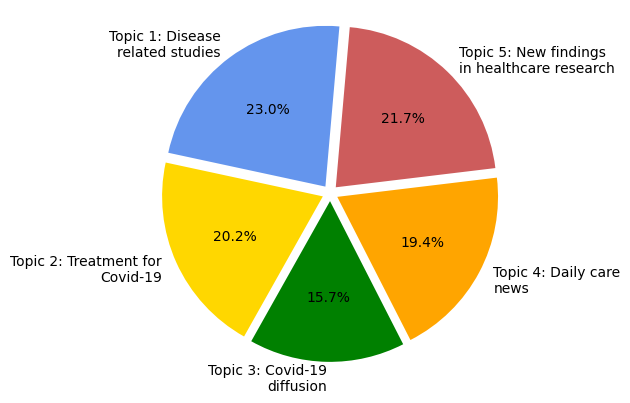

In [30]:
import matplotlib.pyplot as plt

labels= [
    'Topic 1: Disease\nrelated studies', 
    'Topic 2: Treatment for\nCovid-19',
    'Topic 3: Covid-19\ndiffusion', 
    'Topic 4: Daily care\nnews',      
    'Topic 5: New findings\nin healthcare research'
]

colors=['cornflowerblue', 'gold', 'green', 'orange', 'indianred', 
        'lightblue', 'khaki', 'lightgreen', 'bisque', 'coral']

# sizes= [0.21740147, 0.20547668, 0.18152281, 0.18324409, 0.21235495]
sizes = list(np.mean(topic_distributions,axis=0))
fig, ax = plt.subplots()

ax.pie(sizes,labels=labels, 
       colors=colors, 
       startangle=85,
       explode=(0.05, 0.05, 0.05, 0.05, 0.05), 
       autopct='%1.1f%%')

#plt.title('Household Expenses')

ax.axis('equal')
plt.savefig('topic_distribution.eps')
plt.show()

# Annotation artifact

In [45]:
import fasttext
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
import string
count_vect = CountVectorizer(min_df=10,stop_words=[c for c in string.punctuation])
tf_transformer = TfidfTransformer(use_idf=False)

sentences = [e['vi_sentence']['text'] for e in data]
labels = [e['label'] for e in data]
indices = list(range(len(data)))

num_folds = 5
fold_size = len(data)//num_folds

folds = []

for i in range(num_folds):
    folds.append(indices[i*fold_size:min((i+1)*fold_size,len(indices))])

wrong_predicted_indices = []
ft_avg_f1_score = 0
nb_avg_f1_score = 0
for f in range(num_folds):
    print('working on fold ',f)
    val_indices = folds[f]
    train_indices = []
    for i in range(num_folds):
        if i!=f:
            train_indices+=folds[i]

    train_sentences = [sentences[i] for i in train_indices]
    train_labels = [f'__label__{labels[i]}' for i in train_indices]

    val_sentences = [sentences[i] for i in val_indices]
    val_labels = [f'__label__{labels[i]}' for i in val_indices]
    
    
    train_file = open('ft_temp.train.txt','w')
    for i in range(len(train_sentences)):
        train_file.write(f'{train_labels[i]}\t{train_sentences[i]}\n')
    train_file.close()
    ft_model = fasttext.train_supervised(input="ft_temp.train.txt")
    prediction = ft_model.predict(val_sentences)
    prediction = [e[0] for e in prediction[0]]
#     print(f1_score(val_labels,prediction,average='macro'))
    ft_avg_f1_score += f1_score(val_labels,prediction,average='macro')
    
    
    train_vectors = count_vect.fit_transform(train_sentences)
    train_vectors = tf_transformer.fit_transform(train_vectors)

    val_vectors = count_vect.transform(val_sentences)
    val_vectors = tf_transformer.transform(val_vectors)

    clf = MultinomialNB()
    # clf = SVC(gamma='auto',kernel='linear')
    clf.fit(train_vectors, train_labels)
    prediction = clf.predict(val_vectors)
    
    nb_avg_f1_score += f1_score(val_labels,prediction,average='macro')
#     break
    
#     predicted = clf.predict(val_vectors)
print('avg_f1_score = ', ft_avg_f1_score/num_folds, nb_avg_f1_score/num_folds)
    

working on fold  0


Read 0M words
Number of words:  13583
Number of labels: 3
Progress: 100.0% words/sec/thread:  965271 lr:  0.000000 avg.loss:  0.952032 ETA:   0h 0m 0s


working on fold  1


Read 0M words
Number of words:  13427
Number of labels: 3
Progress: 100.0% words/sec/thread:  958276 lr:  0.000000 avg.loss:  0.938698 ETA:   0h 0m 0s


working on fold  2


Read 0M words
Number of words:  13718
Number of labels: 3
Progress: 100.0% words/sec/thread:  963157 lr:  0.000000 avg.loss:  0.927774 ETA:   0h 0m 0s


working on fold  3


Read 0M words
Number of words:  13515
Number of labels: 3
Progress: 100.0% words/sec/thread:  987993 lr:  0.000000 avg.loss:  0.923602 ETA:   0h 0m 0s


working on fold  4


Read 0M words
Number of words:  13253
Number of labels: 3
Progress: 100.0% words/sec/thread:  958035 lr:  0.000000 avg.loss:  0.912823 ETA:   0h 0m 0s


avg_f1_score =  0.570137616506491 0.5487067939245016
